# Gradient Descent Algorithm


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# helper functions for plotting and drawing lines
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

         0         1  2
0  0.78051 -0.063669  1
1  0.28774  0.291390  1
2  0.40714  0.178780  1
3  0.29230  0.421700  1
4  0.50922  0.352560  1


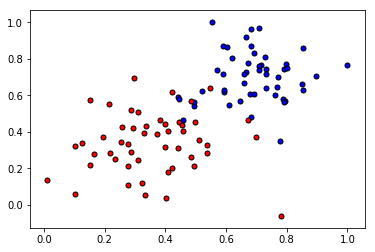

In [5]:
data = pd.read_csv('data.csv',header = None)
print(data.head())
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [6]:
# Implement the following functions

# Activation (sigmoid) function
import math

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))


# Output (prediction) formula
# ̂y = σ(w1x1+w2x2+b)
def output_formula(features, weights, bias):
#     print(weights[:5])
#     print("features ahead")
#     print(features[:5])
    tmp = np.dot(features,weights) + bias
    return sigmoid(tmp)
    

# Error (log-loss) formula
#Error(y,ŷ )=−ylog(ŷ )−(1−y)log(1−  ŷ)  
def error_formula(y, output):
    tmp = -y*np.log(output)-(1-y)*np.log(1-output)
    return tmp

# Gradient descent step
# wi⟶ wi+α(y−ŷ )xi
# b⟶ b+α(y−ŷ)
def update_weights(x, y, weights, bias, learnrate):
    pred = output_formula(x, weights, bias)
    d_error = (y - pred)
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

## Training function


In [7]:
np.random.seed(4)

epochs = 100
learnrate = 0.05

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

('Train loss: ', 0.7154010839627907)
('Accuracy: ', 0.5)
('Train loss: ', 0.452589745551193)
('Accuracy: ', 0.75)
('Train loss: ', 0.3394979300970675)
('Accuracy: ', 0.91)
('Train loss: ', 0.2842250733455759)
('Accuracy: ', 0.92)
('Train loss: ', 0.2518622531724435)
('Accuracy: ', 0.93)
('Train loss: ', 0.23064672725984675)
('Accuracy: ', 0.93)
('Train loss: ', 0.2156610779093807)
('Accuracy: ', 0.93)
('Train loss: ', 0.2045073798574997)
('Accuracy: ', 0.93)
('Train loss: ', 0.19587997692588222)
('Accuracy: ', 0.93)
('Train loss: ', 0.18900737406023488)
('Accuracy: ', 0.94)


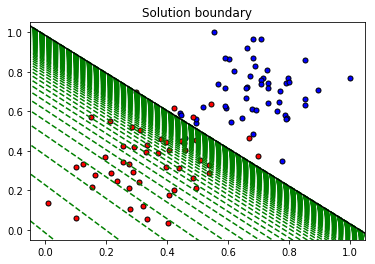

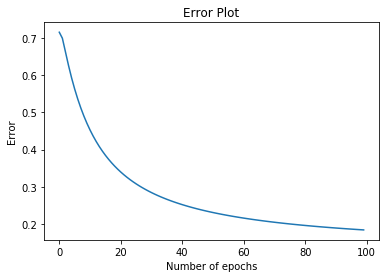

In [8]:
train(X, y, epochs, learnrate, True)

# done!!